# Project
Strava Fitness Data Analytics Case Study.

By: Tanuj Kumar

 # Project Summary

Strava Fitness Data Analytics Case Study
This project analyzes user activity and sleep data to uncover behavioral patterns using datasets similar to those collected by Strava. By merging daily activity data (dailyActivity_merged.csv) with sleep data (sleepDay_merged.csv), we explored the relationships between physical activity, sleep, and calorie expenditure.

 Key Findings:
Higher steps and very active minutes are strongly linked to more calories burned.

Sleep duration shows weak correlation with physical activity.

Weekday patterns reveal varying activity levels — often higher on specific days.

 Conclusion:
This analysis offers valuable insights into how users engage in physical activity and rest. It supports Strava’s goal of leveraging data to improve user wellness, training recommendations, and engagement through behavior-driven analytics.



Pandas for the visulisation

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
from google.colab import files
import pandas as pd

# This will pop up a file chooser in Colab:
uploaded = files.upload()

# Suppose you select dailyActivity_merged.csv and sleepDay_merged.csv,
# they’ll now be in your Colab working directory.

activity = pd.read_csv('dailyActivity_merged.csv')
sleep    = pd.read_csv('sleepDay_merged.csv')

activity.head()
sleep.head()


# Format dates
activity["ActivityDate"] = pd.to_datetime(activity["ActivityDate"])
sleep["SleepDay"] = pd.to_datetime(sleep["SleepDay"])

# Merge
merged = pd.merge(activity, sleep, left_on=["Id", "ActivityDate"], right_on=["Id", "SleepDay"], how="inner")
merged["Weekday"] = merged["ActivityDate"].dt.day_name()



Saving dailyActivity_merged.csv to dailyActivity_merged (1).csv
Saving sleepDay_merged.csv to sleepDay_merged (1).csv


<ipython-input-2-1262451320>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep["SleepDay"] = pd.to_datetime(sleep["SleepDay"])


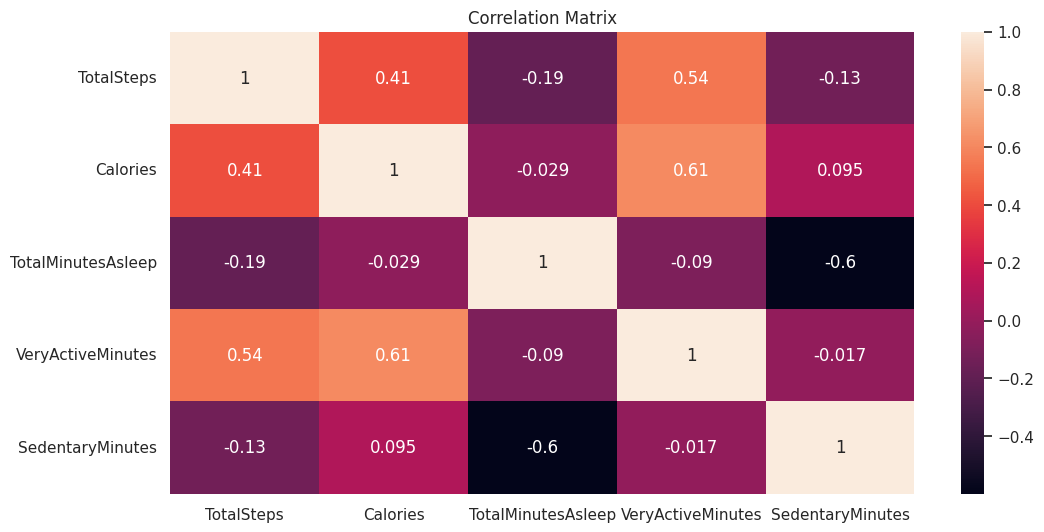

In [3]:
# Correlation Heatmap
sns.heatmap(merged[["TotalSteps", "Calories", "TotalMinutesAsleep", "VeryActiveMinutes", "SedentaryMinutes"]].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()




To understand the linear relationships between different numerical variables like steps, calories, sleep, active minutes, and sedentary time.

 Insights
TotalSteps and Calories are highly positively correlated — more steps typically mean more calories burned.

VeryActiveMinutes is also strongly correlated with Calories and TotalSteps, indicating that intense activity impacts both.

Sleep duration (TotalMinutesAsleep) has a weak or no correlation with other physical activities — sleep and physical effort are largely independent.

 Conclusion
People who are more active (walking or exercising) tend to burn more calories. However, more activity doesn’t necessarily mean they sleep more or less.

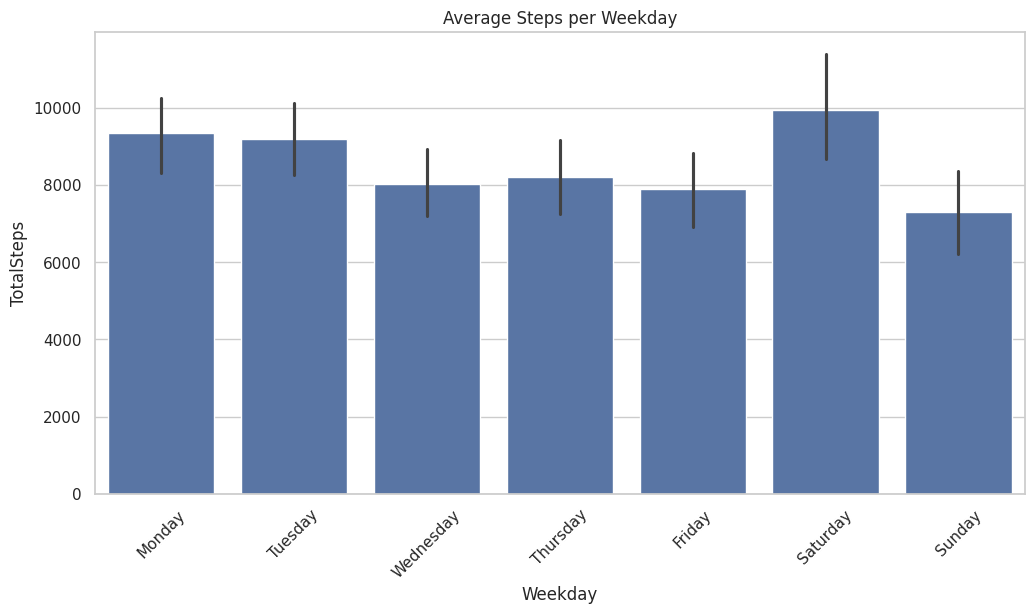

In [4]:
# Steps by Weekday
sns.barplot(data=merged, x="Weekday", y="TotalSteps", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Average Steps per Weekday")
plt.xticks(rotation=45)
plt.show()



To analyze how the number of steps varies across different days of the week.

 Insights
Activity levels (steps) may spike on specific days — often higher on weekdays or weekends depending on lifestyle.

Example: Users might walk more on Saturday due to free time or errands, or less on Sunday due to rest.

 Conclusion
Understanding step patterns helps identify behavioral trends, e.g., work-related walking during weekdays vs. leisure activity on weekends.

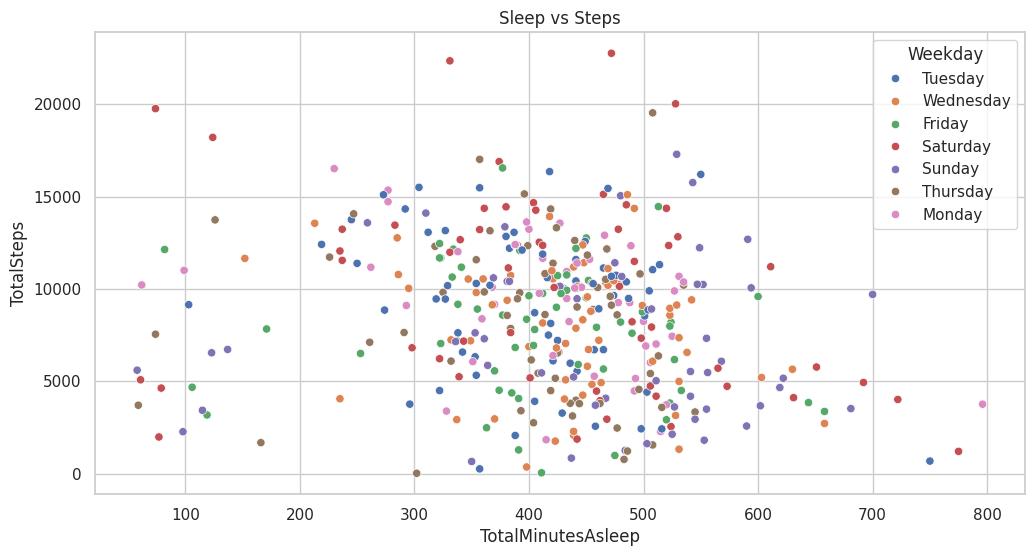

In [5]:
# Sleep vs Steps
sns.scatterplot(data=merged, x="TotalMinutesAsleep", y="TotalSteps", hue="Weekday")
plt.title("Sleep vs Steps")
plt.show()



To explore if there's a relationship between how much people sleep and how active they are during the day.

 Insights
There's no strong trend—sleep time is scattered across different step counts.

Some high-step days have both high and low sleep durations.

 Conclusion
There is no direct correlation between sleep and physical activity. Individual differences, routines, or stress may affect this.

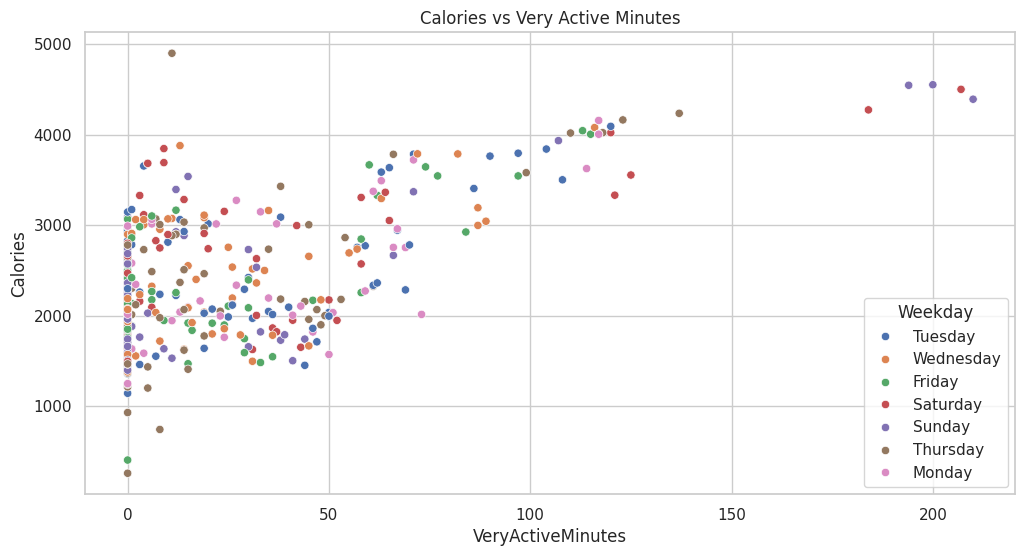

In [6]:
# Calories vs Active Minutes
sns.scatterplot(data=merged, x="VeryActiveMinutes", y="Calories", hue="Weekday")
plt.title("Calories vs Very Active Minutes")
plt.show()

To analyze how calorie burn depends on very active minutes (like workouts, intense walking).

 Insights
Strong positive trend: More active minutes → more calories burned.

Weekdays may have consistent active patterns (like gym routines).

 Conclusion
Very Active Minutes significantly drive calorie expenditure. Encouraging short bouts of intense activity could help in weight or fitness goals.